# Importing Libs

In [1]:
!pip install xgboost

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, roc_auc_score
from xgboost import XGBRegressor


import warnings
warnings.filterwarnings("ignore")


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Procom Fast'

In [4]:
!kaggle competitions download -c procom-25-data-science-round-2

'kaggle' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
# import zipfile

# with zipfile.ZipFile("/content/drive/MyDrive/Procom Fast/procom-25-data-science-round-2.zip", "r") as zip_ref:
#     zip_ref.extractall("/content/drive/MyDrive/Procom Fast/procom-25-data-science-round-2")


# Loading Dataset

In [8]:
# Load train and test datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Display first few rows
train_df.head()


,id,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,...,Feature_88,Feature_89,Feature_90,Feature_91,Feature_92,Feature_93,Feature_94,Feature_95,Feature_96,Target
0,32c49123,0.266560,-0.401624,0.169658,-3.277997,-0.773446,High,A,-0.179990,0.000483,...,0.358484,0.350167,-0.144210,0.683301,0.419650,0.934178,-1.452299,-0.576781,-2.229503,0
1,d95c2025,0.550782,0.770702,-0.822875,0.508706,2.525633,High,C,-2.192682,0.350916,...,0.114086,0.460877,1.116115,1.230026,-0.077886,-1.105025,0.284516,-1.132336,-0.579141,0
2,0d0fdb83,1.770748,0.845514,-0.556853,0.357719,1.216412,Low,B,1.075626,1.054329,...,-1.094633,0.511077,0.403522,-0.758625,-0.447456,-0.747422,1.152247,0.172472,-0.023930,0
3,c1903ac5,0.571699,-0.885277,0.883859,-0.022472,-0.862158,Medium,C,-0.491810,-0.702181,...,0.269688,-1.855474,-0.092872,-0.514891,-2.938242,1.109416,-0.476466,-2.173840,0.647640,0
4,71a7121b,0.301486,-1.254704,-0.216733,-0.526099,0.193846,Medium,D,0.565314,-0.081904,...,0.004366,-0.508855,1.792284,1.194880,-0.641066,-0.303307,-0.192202,-0.689040,-1.142076,0


# EDA

In [9]:
# Basic info
print(train_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70063 entries, 0 to 70062
Data columns (total 99 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          70063 non-null  object 
 1   Feature_0   70063 non-null  float64
 2   Feature_1   70063 non-null  float64
 3   Feature_2   70063 non-null  float64
 4   Feature_3   70063 non-null  float64
 5   Feature_4   70063 non-null  float64
 6   Feature_5   70063 non-null  object 
 7   Feature_6   70063 non-null  object 
 8   Feature_7   70063 non-null  float64
 9   Feature_8   70063 non-null  float64
 10  Feature_9   70063 non-null  float64
 11  Feature_10  70063 non-null  float64
 12  Feature_11  70063 non-null  float64
 13  Feature_12  70063 non-null  float64
 14  Feature_13  70063 non-null  float64
 15  Feature_14  70063 non-null  float64
 16  Feature_15  70063 non-null  float64
 17  Feature_16  70063 non-null  float64
 18  Feature_17  70063 non-null  float64
 19  Feature_18  70063 non-nul

In [10]:
# Check for missing values
print(train_df.isnull().sum().sum())
# Summary statistics
print(train_df.describe())

0
          Feature_0     Feature_1     Feature_2     Feature_3     Feature_4  \
count  70063.000000  70063.000000  70063.000000  70063.000000  70063.000000   
mean       0.002541      0.005038      0.003800     -0.002740     -0.000522   
std        0.998475      1.002843      1.004483      0.998499      0.998144   
min       -4.124041     -4.164295     -4.284007     -4.297178     -4.127219   
25%       -0.672995     -0.670894     -0.669638     -0.674814     -0.672537   
50%        0.005582      0.007541      0.010475      0.001202      0.001902   
75%        0.677317      0.678750      0.684390      0.673191      0.670357   
max        4.337424      3.906581      4.737739      3.985917      4.357233   

          Feature_7     Feature_8     Feature_9    Feature_10    Feature_11  \
count  70063.000000  70063.000000  70063.000000  70063.000000  70063.000000   
mean      -0.007057      0.008172      0.001328      0.003023      0.002181   
std        0.998253      0.998273      1.000919  

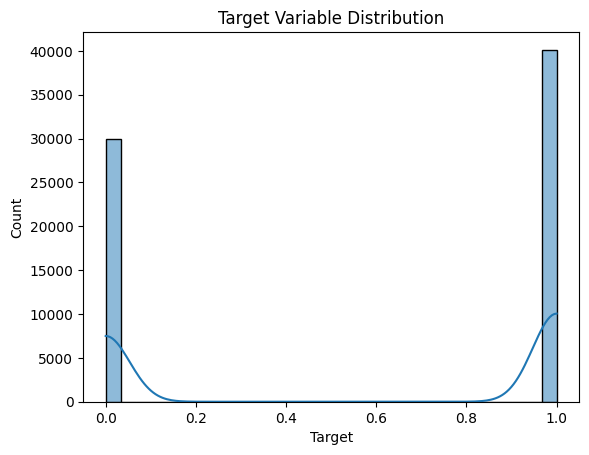

In [12]:
# Visualize target distribution
sns.histplot(train_df['Target'], bins=30, kde=True)
plt.title("Target Variable Distribution")
plt.show()


In [13]:
class_counts = train_df['Target'].value_counts()
minority_class_ratio = class_counts.min() / class_counts.sum()
print(f"Minority class ratio: {minority_class_ratio:.2f}")


Minority class ratio: 0.43


In [14]:
# drop ID of train df
train_df.drop(columns=['id'], inplace=True)

In [ ]:
test_df.head()

,id,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,...,Feature_87,Feature_88,Feature_89,Feature_90,Feature_91,Feature_92,Feature_93,Feature_94,Feature_95,Feature_96
0,304df2c5,0.780022,0.692186,0.319716,-1.741763,-0.464338,High,A,0.017927,-1.056120,...,0.061822,-0.053156,2.870774,2.212478,1.036519,1.571718,1.159780,0.920462,0.460662,-0.505707
1,3b60ea21,0.357412,1.262831,1.412277,1.091122,0.760032,Medium,B,-0.638940,-0.235438,...,0.618935,-1.604885,0.014158,-0.448452,1.123486,-1.199608,-1.269375,0.207608,0.751994,0.361998
2,10e87553,-0.108856,-1.543660,0.260069,-0.341300,0.014408,Low,D,1.192535,1.350894,...,-0.063338,0.230735,0.590659,-0.534007,-1.223872,-1.655884,1.454513,-0.269368,-0.747581,0.175358
3,70465b24,-0.214758,-1.032158,1.559311,0.118561,0.361352,Medium,D,-0.982566,-0.600590,...,0.968366,2.266468,-0.641533,-0.705847,1.561411,0.505268,-0.155138,0.584343,-1.602724,0.347955
4,f5dfe16a,0.176148,0.935832,-1.311808,-1.116206,0.376311,High,C,1.681389,-2.107464,...,-0.865030,0.902369,-1.017113,0.271411,0.803561,-0.194277,2.258655,1.381430,0.849969,0.048291


## Missing Values

In [15]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 98 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          25000 non-null  object 
 1   Feature_0   25000 non-null  float64
 2   Feature_1   25000 non-null  float64
 3   Feature_2   25000 non-null  float64
 4   Feature_3   25000 non-null  float64
 5   Feature_4   25000 non-null  float64
 6   Feature_5   25000 non-null  object 
 7   Feature_6   25000 non-null  object 
 8   Feature_7   25000 non-null  float64
 9   Feature_8   25000 non-null  float64
 10  Feature_9   25000 non-null  float64
 11  Feature_10  25000 non-null  float64
 12  Feature_11  25000 non-null  float64
 13  Feature_12  25000 non-null  float64
 14  Feature_13  25000 non-null  float64
 15  Feature_14  25000 non-null  float64
 16  Feature_15  25000 non-null  float64
 17  Feature_16  25000 non-null  float64
 18  Feature_17  25000 non-null  float64
 19  Feature_18  25000 non-nul

In [16]:
# Check missing values
print(train_df.isnull().sum().sum())
print(test_df.isnull().sum().sum())

0
0


In [17]:

# fill missing values of type number with median, and object with mode
categorical_cols_train = train_df.select_dtypes(include=['object']).columns
numerical_columns_train = train_df.select_dtypes(include=["number"]).columns

for col in categorical_cols_train:
    train_df[col].fillna(train_df[col].mode()[0], inplace=True)

for col in numerical_columns_train:
    train_df[col].fillna(train_df[col].median(), inplace=True)


In [18]:
print(categorical_cols_train)

Index(['Feature_5', 'Feature_6', 'Feature_27', 'Feature_28', 'Feature_46',
       'Feature_47', 'Feature_65', 'Feature_66'],
      dtype='object')


In [19]:
train_df.select_dtypes(include=['object']).columns

Index(['Feature_5', 'Feature_6', 'Feature_27', 'Feature_28', 'Feature_46',
       'Feature_47', 'Feature_65', 'Feature_66'],
      dtype='object')

## Missing values for test df

In [20]:
# Check missing values
print(test_df.isnull().sum())

id            0
Feature_0     0
Feature_1     0
Feature_2     0
Feature_3     0
             ..
Feature_92    0
Feature_93    0
Feature_94    0
Feature_95    0
Feature_96    0
Length: 98, dtype: int64


In [21]:
# fill missing values of type number with median, and object with mode
categorical_cols_test = test_df.select_dtypes(include=['object']).columns
numerical_columns_test = test_df.select_dtypes(include=["number"]).columns

for col in categorical_cols_test:
    test_df[col].fillna(test_df[col].mode()[0], inplace=True)

for col in numerical_columns_test:
    test_df[col].fillna(test_df[col].median(), inplace=True)


In [22]:
test_df.drop(columns='id')

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_87,Feature_88,Feature_89,Feature_90,Feature_91,Feature_92,Feature_93,Feature_94,Feature_95,Feature_96
0,0.780022,0.692186,0.319716,-1.741763,-0.464338,High,A,0.017927,-1.056120,0.067130,...,0.061822,-0.053156,2.870774,2.212478,1.036519,1.571718,1.159780,0.920462,0.460662,-0.505707
1,0.357412,1.262831,1.412277,1.091122,0.760032,Medium,B,-0.638940,-0.235438,1.844886,...,0.618935,-1.604885,0.014158,-0.448452,1.123486,-1.199608,-1.269375,0.207608,0.751994,0.361998
2,-0.108856,-1.543660,0.260069,-0.341300,0.014408,Low,D,1.192535,1.350894,2.270047,...,-0.063338,0.230735,0.590659,-0.534007,-1.223872,-1.655884,1.454513,-0.269368,-0.747581,0.175358
3,-0.214758,-1.032158,1.559311,0.118561,0.361352,Medium,D,-0.982566,-0.600590,0.695248,...,0.968366,2.266468,-0.641533,-0.705847,1.561411,0.505268,-0.155138,0.584343,-1.602724,0.347955
4,0.176148,0.935832,-1.311808,-1.116206,0.376311,High,C,1.681389,-2.107464,0.111668,...,-0.865030,0.902369,-1.017113,0.271411,0.803561,-0.194277,2.258655,1.381430,0.849969,0.048291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,1.320100,-1.230118,-2.315860,1.049175,2.057945,High,C,0.030602,-1.242063,0.849371,...,0.188979,0.483387,0.513034,-0.529928,-1.216979,-0.847397,-0.695698,0.698836,0.057109,1.212488
24996,0.524606,0.678000,1.301798,0.325015,-0.113215,Medium,B,-0.430750,1.774882,0.081506,...,-0.688964,0.789521,-0.877289,0.415845,0.525479,-0.618586,0.962983,-0.522948,0.192865,0.767668
24997,0.616407,-0.180367,1.659073,-0.288915,-1.203107,Medium,D,-0.159056,0.071170,-0.221932,...,-0.681163,-0.076618,-0.964650,0.854162,0.431698,0.460615,1.611285,0.372824,0.579407,0.397091
24998,-0.437678,-1.606877,-0.413797,0.058580,-1.098550,Medium,A,1.176234,0.247093,-0.563293,...,0.243456,0.528967,0.148961,1.066985,-2.881956,-0.266959,-0.534022,1.415744,-0.370959,-0.678534


#Encoding Categorical Variables

In [23]:
from sklearn.preprocessing import LabelEncoder

for col in categorical_cols_train:
    le = LabelEncoder()

    # Fit on training data only
    train_df[col] = le.fit_transform(train_df[col])

    # Transform test data safely
    test_df[col] = test_df[col].map(lambda x: le.transform([x])[0] if x in le.classes_ else -1)


## Normalization

In [ ]:
%pip install scipy==1.13.0


^C
Note: you may need to restart the kernel to use updated packages.


   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/46.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/46.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/46.2 MB ? eta -:--:--
   ---------------------------------------- 0.5/46.2 MB 390.1 kB/s eta 0:01:58
   ---------------------------------------- 0.5/46.2 MB 390.1 kB/s eta 0:01:58
   ---------------------------------------- 0.5/46.2 MB 390.1 kB/s eta 0:01:58
    --------------------------------------- 0.8/46.2 MB 376.9 kB/s eta 0:02:01
    --------------------------------------- 0.8/46.2 MB 376.9 kB/s eta 0:02:01
    --------------------------------------- 0.8/46.2 MB 376.9 kB/s eta 0:02:01
    --------------------------------------- 1.0/46.2 MB 370.1 kB/s eta 0:02:03
    --------------------------------------- 1.0/46.2 MB 370.1 kB/s eta 0:02:03
    --------------

  You can safely remove it manually.
  You can safely remove it manually.


In [ ]:
# **Normalization Techniques**
# Z-Score Normalization
import numpy as np
from scipy.stats import zscore, winsorize


train_df_z = train_df.copy()
test_df_z = test_df.copy()
numerical_cols = train_df.select_dtypes(include=[np.number]).columns.difference(['target'])  # Exclude target
train_df_z[numerical_cols] = train_df[numerical_cols].apply(zscore)
test_df_z[numerical_cols] = test_df[numerical_cols].apply(zscore)

# Winsorization (Limit extreme values)
train_df_winsor = train_df.copy()
test_df_winsor = test_df.copy()
for col in numerical_cols:
    train_df_winsor[col] = winsorize(train_df[col], limits=[0.05, 0.05])  # 5% Winsorization
    test_df_winsor[col] = winsorize(test_df[col], limits=[0.05, 0.05])

## Correlation

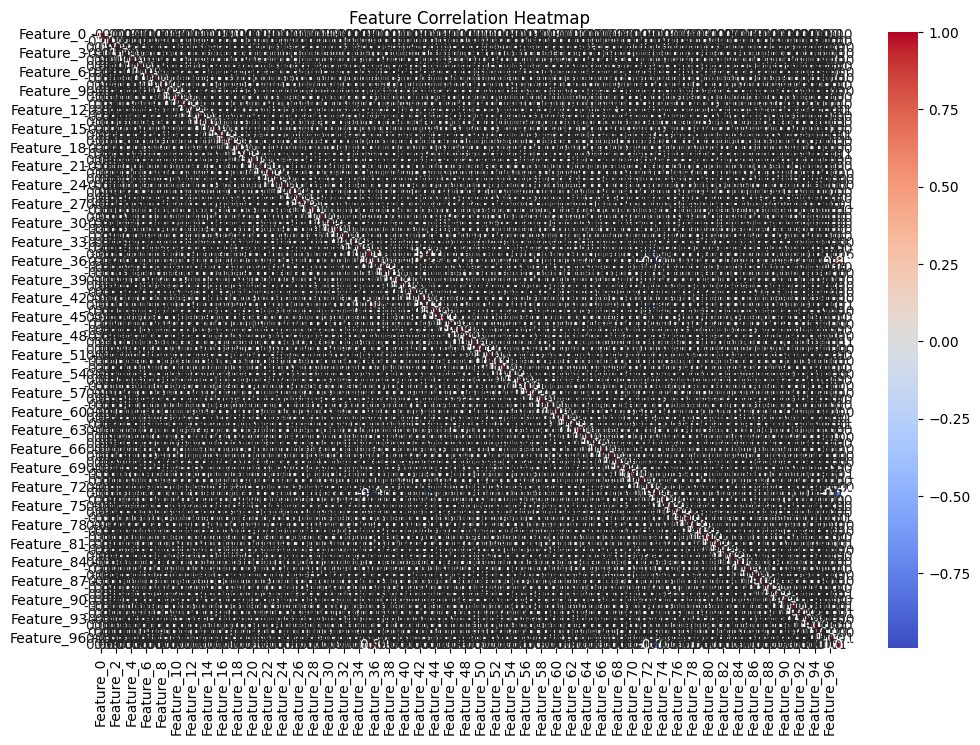

In [26]:
# Correlations
plt.figure(figsize=(12, 8))
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [28]:
# target variable distribution
plt.figure(figsize=(8, 5))
sns.histplot(train_df['target'], bins=30, kde=True)
plt.title("Distribution of Target Variable")
plt.show()


KeyError: 'target'

<Figure size 800x500 with 0 Axes>

In [29]:
# Highly correlated fewtures
# Find highly correlated features (Threshold > 0.85)
correlated_features = set()
correlation_matrix = train_df.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.85:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

print("Highly Correlated Features to Consider Dropping:", correlated_features)


Highly Correlated Features to Consider Dropping: {'Feature_73', 'Feature_43'}


In [30]:
# Drop highly correlated features from train and test datasets
train_df_cleaned = train_df.drop(columns=correlated_features)
test_df_cleaned = test_df.drop(columns=correlated_features)

print("Final Shape after Dropping Correlated Features:", train_df_cleaned.shape)


Final Shape after Dropping Correlated Features: (70063, 96)


## Outliers

In [31]:
# Define the target column
target_col = 'Target'  # Replace with the actual target column name

# Compute Q1, Q3, and IQR for all columns except target
Q1 = train_df.drop(columns=[target_col]).quantile(0.25)
Q3 = train_df.drop(columns=[target_col]).quantile(0.75)
IQR = Q3 - Q1

# Defining lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detecting outliers
outliers = ((train_df.drop(columns=[target_col]) < lower_bound) |
            (train_df.drop(columns=[target_col]) > upper_bound))

# Counting outliers per column
outlier_counts = outliers.sum().sort_values(ascending=False)

# Display sorted outlier counts
print("Outlier counts per column:")
print(outlier_counts)



Outlier counts per column:
Feature_77    579
Feature_26    578
Feature_91    560
Feature_71    544
Feature_60    541
             ... 
Feature_6       0
Feature_46      0
Feature_47      0
Feature_65      0
Feature_66      0
Length: 97, dtype: int64


In [32]:

# Filtering the DataFrame to Remove Outliers
train_df_no_outliers = train_df[~outliers.any(axis=1)].reset_index(drop=True)

# Display Shapes Before & After Outlier Removal
print(f"Original Shape: {train_df.shape}, After Outlier Removal: {train_df_no_outliers.shape}")


Original Shape: (70063, 98), After Outlier Removal: (38461, 98)


In [38]:
# feature importance
# Train a basic XGBoost model
xgb_temp = XGBRegressor(n_estimators=100, random_state=42)
col_del = train_df.drop(columns=['Target'])
xgb_temp.fit(col_del, train_df['Target'])

# Get feature importance
feature_importance = pd.DataFrame({'Feature': train_df.drop(columns=['Target']).columns, 'Importance': xgb_temp.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)



 # Feature Engineering

In [41]:
train_df.head()

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_90,Feature_91,Feature_92,Feature_93,Feature_94,Feature_95,Feature_96,Target,feature_sum,Feature_sum
0,0.266560,-0.401624,0.169658,-3.277997,-0.773446,0,0,-0.179990,0.000483,0.914272,...,-0.144210,0.683301,0.419650,0.934178,-1.452299,-0.576781,-2.229503,0,-9.779616,-9.779616
1,0.550782,0.770702,-0.822875,0.508706,2.525633,0,2,-2.192682,0.350916,-0.278386,...,1.116115,1.230026,-0.077886,-1.105025,0.284516,-1.132336,-0.579141,0,29.889671,29.889671
2,1.770748,0.845514,-0.556853,0.357719,1.216412,1,1,1.075626,1.054329,0.530334,...,0.403522,-0.758625,-0.447456,-0.747422,1.152247,0.172472,-0.023930,0,-1.474718,-1.474718
3,0.571699,-0.885277,0.883859,-0.022472,-0.862158,2,2,-0.491810,-0.702181,-0.780577,...,-0.092872,-0.514891,-2.938242,1.109416,-0.476466,-2.173840,0.647640,0,-10.774142,-10.774142
4,0.301486,-1.254704,-0.216733,-0.526099,0.193846,2,3,0.565314,-0.081904,0.645766,...,1.792284,1.194880,-0.641066,-0.303307,-0.192202,-0.689040,-1.142076,0,19.387637,19.387637


In [44]:
# Ensure all columns are numeric before performing operations
train_df.iloc[:, :-1] = train_df.iloc[:, :-1].apply(pd.to_numeric, errors='coerce')
test_df.iloc[:, :] = test_df.iloc[:, :].apply(pd.to_numeric, errors='coerce')

# Calculate the sum of features
train_df['feature_sum'] = train_df.iloc[:, :-1].sum(axis=1)
test_df['feature_sum'] = test_df.iloc[:, :].sum(axis=1)

# Log transformation (for skewed data)
train_df['Target'] = np.log1p(train_df['Target'])

In [ ]:
%pip install catboost

^C
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'e:\\PythonImp\\anaconda\\envs\\python_ml\\Lib\\site-packages\\catboost\\_catboost.pyd'
Consider using the `--user` option or check the permissions.



  Using cached catboost-1.2.8-cp310-cp310-win_amd64.whl.metadata (1.5 kB)
  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
  Using cached plotly-6.0.1-py3-none-any.whl.metadata (6.7 kB)
  Using cached narwhals-1.35.0-py3-none-any.whl.metadata (9.2 kB)
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.5 MB ? eta -:--:--
   -------------------

In [49]:
pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.5 MB 258.0 kB/s eta 0:00:04
   -------------- ------------------------- 0.5/1.5 MB 258.0 kB/s eta 0:00:04
   -------------- ------------------------- 0.5/1.5 MB 258.0 kB/s eta 0:00:04
   --------------------- ------------------ 0.8/1.5 MB 313.6 kB/s eta 0:00:03
   --------------------- ------------------ 0.8/1.5 MB 313.6 kB/s eta 0:00:03
   ---------------------------- ----------- 1.0/1.5 MB 375.6 kB/s eta 0:00:02
   ---------------------------- ----------- 1.0/1.5 MB 375.6 kB/s eta 0:00:02
   ---------------------------- --------

In [52]:
pip install catboost

  Using cached catboost-1.2.8-cp310-cp310-win_amd64.whl.metadata (1.5 kB)
Using cached catboost-1.2.8-cp310-cp310-win_amd64.whl (102.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [56]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import catboost as cb
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score

# Define datasets
datasets = {
    "Original": train_df,
    "No_Outliers": train_df_no_outliers,
    # "Cleaned": df_train_cleaned,
    # "Z-Score": train_df_z,
    # "Winsorized": train_df_winsor
}

# Define models and their hyperparameters
models = {
        # "Logistic Regression": (LogisticRegression(max_iter=1000), {'C': [0.01, 0.1, 1, 10]}),
        # "Random Forest": (RandomForestClassifier(), {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}),
        # "Extra Trees": (ExtraTreesClassifier(), {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}),
        "XGBoost": (xgb.XGBRegressor(use_label_encoder=False, eval_metric='logloss'), # Changed to XGBRegressor
                    {'n_estimators': [100, 200], 'max_depth': [3, 6], 'learning_rate': [0.01, 0.1, 0.3]}),
        "LightGBM": (lgb.LGBMRegressor(), {'n_estimators': [100, 200], 'num_leaves': [31, 50], 'learning_rate': [0.01, 0.1, 0.3]}), # Changed to LGBMRegressor
        # "CatBoost": (cb.CatBoostClassifier(verbose=0), {'iterations': [200, 300], 'depth': [6, 8], 'learning_rate': [0.01, 0.1, 0.3]}), # Commented out if target is continuous
        # "HistGradientBoosting": (HistGradientBoostingClassifier(), {'max_iter': [200, 300], 'learning_rate': [0.01, 0.1, 0.3]}) # Commented out if target is continuous
    }

# Store best results
best_score = 0
best_model = None
best_dataset_name = None

for dataset_name, df in datasets.items():
    print(f"\n🔹 Evaluating on {dataset_name} dataset...")

    # Prepare Data
    X = df.drop(columns=['Target'])  # Features
    y = df['Target']  # Target

    # Train-Test Split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    for model_name, (model, param_grid) in models.items():
        print(f"  🔸 Training {model_name}...")

        # Perform Grid Search for hyperparameter tuning
        grid_search = GridSearchCV(model, param_grid, scoring='roc_auc', cv=5, n_jobs=-1, verbose=0)
        grid_search.fit(X_train, y_train)

    # Evaluate the best model
    best_estimator = grid_search.best_estimator_
    y_pred = best_estimator.predict(X_val)  # Get prediction for regression

    # Compute ROC AUC
    score = mean_squared_error(y_val, y_pred)

    print(f"    🔹 {model_name} - Best ROC AUC: {score:.4f}")

        # Update best model if this one is better
    if score > best_score:
          best_score = score
          best_model = best_estimator
          best_dataset_name = dataset_name

# Display Best Model & Dataset
print("\n✅ Best Dataset:", best_dataset_name)
print("✅ Best Model:", best_model)
print(f"✅ Best ROC AUC Score: {best_score:.4f}")


🔹 Evaluating on Original dataset...
  🔸 Training XGBoost...
  🔸 Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.095522 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23230
[LightGBM] [Info] Number of data points in the train set: 56050, number of used features: 99
[LightGBM] [Info] Start training from score 0.396980
    🔹 LightGBM - Best ROC AUC: 0.0223

🔹 Evaluating on No_Outliers dataset...
  🔸 Training XGBoost...
  🔸 Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.035699 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22720
[LightGBM] [Info] Number of data points in the train set: 30768, number of used features: 97
[LightGBM] [Info] Start training from score 0.572543
    🔹 LightGBM - Best ROC AUC: 0.0475

✅ Best Dataset: No_Outliers
✅ Best Model: LGBMRegressor(learni

# Spliting Dataset

In [59]:
# Define features and target
X = train_df.drop(columns=["Target"])
y = train_df["Target"]

# Split into train & validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Scaling

In [61]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
# Ensure test_df has the same columns as X_train
X_test = test_df.drop(columns=['id'], errors='ignore')  # Drop 'id' column if it exists
if 'Feature_sum' not in X_test.columns:
	X_test['Feature_sum'] = X_test.sum(axis=1)  # Add 'Feature_sum' if missing

# Scale the test dataset
X_test = scaler.transform(X_test)


 # XGBoost Model Training (Without Tuning)

In [64]:
# Initialize model
xgb_model = XGBRegressor(n_estimators=300, learning_rate=0.05, tree_method="hist", eval_metric="rmse")

# Train model with early stopping
xgb_model.fit(
	X_train, 
	y_train, 
	eval_set=[(X_val, y_val)], 
	verbose=False
)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

# Hyperparameter Tuning using GridSearchCV

In [65]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define Hyperparameter Grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_lambda': [0, 1, 5]
}


In [ ]:
# Initialize XGBoost Model
xgb_model = XGBRegressor(tree_method='hist', random_state=42)

# Grid Search
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,  # 5-fold Cross-Validation
    scoring='roc_auc',  # Optimizing for ROC AUC
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 2187 candidates, totalling 10935 fits


In [ ]:
# Train Model with Best Hyperparameters
best_xgb = XGBRegressor(**grid_search.best_params_, tree_method='hist', random_state=42)
best_xgb.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import roc_auc_score

# Predictions
y_pred = best_xgb.predict(X_val)

# Compute AUC-ROC Score
auc_score = roc_auc_score(y_val, y_pred)
print(f"ROC AUC Score: {auc_score:.4f}")


In [ ]:
import joblib

# Save the trained model
joblib.dump(best_xgb, "xgb_best_model.pkl")

# Load model later
# best_xgb = joblib.load("xgb_best_model.pkl")


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Procom Fast/'

In [ ]:
!kaggle competitions download -c data-science-round-1-procom-25

 63% 7.00M/11.2M [00:00<00:00, 72.4MB/s]
100% 11.2M/11.2M [00:00<00:00, 99.9MB/s]


In [ ]:
import zipfile

with zipfile.ZipFile("/content/drive/MyDrive/Procom Fast/data-science-round-1-procom-25.zip", "r") as zip_ref:
    zip_ref.extractall("/content/drive/MyDrive/Procom Fast/data-science-round-1-procom-25")


In [ ]:
df_train =pd.read_csv("/content/drive/MyDrive/Procom Fast/data-science-round-1-procom-25/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Procom Fast/data-science-round-1-procom-25/test.csv")

In [ ]:
categorical_cols_train = df_train.select_dtypes(include=['object']).columns
categorical_cols_test = df_test.select_dtypes(include=['object']).columns

numerical_columns_train = df_train.select_dtypes(include=["number"]).columns
numerical_columns_test = df_test.select_dtypes(include=['number']).columns

In [ ]:
for col in categorical_cols_train:
  if col != 'target':
    df_train[col]=df_train[col].fillna(df_train[col].mode()[0])

for col in categorical_cols_test:
  df_test[col]=df_test[col].fillna(df_train[col].mode()[0])

for col in numerical_columns_train:
  df_train[col]=df_train[col].fillna(df_train[col].median())

for col in numerical_columns_test:
  df_test[col]=df_test[col].fillna(df_train[col].median())

<ipython-input-16-6f580bf01c27>:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test[col]=df_test[col].fillna(df_train[col].mode()[0])


In [ ]:
df_train.isna().sum().sum()

0

In [ ]:
df_test.isna().sum().sum()

0

In [ ]:
# using label encoder to encode categorical columns
le = LabelEncoder()
for col in categorical_cols_train:
  df_train[col] = le.fit_transform(df_train[col])



In [ ]:
df_train.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [ ]:
for col in categorical_cols_test:
  df_test[col] = df_test[col].map(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

In [ ]:
df_test.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [ ]:
# remove outliers
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3-Q1
    lower_bound= Q1-1.5*IQR
    upper_bound=Q3 + 1.5 * IQR

    return df.clip(lower = lower_bound, upper = upper_bound, axis =1)

train_iqr = remove_outliers(df_train.drop(columns=['id', 'target']))


test_iqr = remove_outliers(df_test.drop(columns=['id']))




In [ ]:
train_iqr['target'] = df_train['target']
train_iqr['id'] = df_train['id'].sort_values(ascending= True)

In [ ]:
train_iqr.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x19,x20,x21,x22,x23,x24,x25,x26,target,id
0,44.0,56094.0,89624.0,641,66,3.0,13.52,12,0.11,1,...,1,5,3,43.647232,9,0,639,1,0,94449
1,51.0,82443.0,165517.0,782,86,3.0,23.19,48,0.45,0,...,0,7,4,64.134993,2,1,781,1,0,15369
2,44.0,100585.0,229235.0,1009,63,4.0,8.65,60,0.52,3,...,0,22,4,55.390556,6,0,1008,1,0,107151
3,41.0,38688.0,70195.0,817,99,2.0,5.03,60,0.87,0,...,1,20,7,24.050544,1,0,818,0,0,14196
4,44.0,72319.0,213954.0,844,53,4.0,14.47,12,0.45,1,...,1,16,7,89.721414,4,1,844,0,0,67500


In [ ]:
from scipy.stats import zscore

# Apply Z-score normalization to numerical columns
train_iqr_z = train_iqr.select_dtypes(include=['number']).apply(zscore)

test_iqr_z = df_test.select_dtypes(include=['number']).apply(zscore)


In [ ]:
train_iqr_z['target'] = train_iqr['target']
train_iqr_z['id'] = train_iqr['id']

In [ ]:
# train test split
X = df_train.drop(columns=['target'])
y = df_train['target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = RandomForestClassifier(max_depth=18, n_estimators= 148)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
f1_score(y_val, y_pred)


0.5143261407852847

In [ ]:
test_pred= model.predict(df_test)

In [ ]:
# find the number of 1 and 0 in test_pred
unique, counts = np.unique(test_pred, return_counts=True)
dict(zip(unique, counts))

{0: 67490, 1: 115}

In [ ]:
# count the number of 1 in target in df_train
df_train['target'].value_counts()

,count
target,
0,143985
1,20757
